# Sales prediction

## Imports and settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [1]:
SEED = 66

# Load data

In [3]:
df = pd.read_csv('../../datasets/Sales.csv')

In [6]:
df.sample(n=10, random_state=SEED)

,TV,Radio,Newspaper,Sales
167,206.8,5.2,19.4,17.2
106,25.0,11.0,29.7,7.2
17,281.4,39.6,55.8,24.4
118,125.7,36.9,79.2,15.9
52,216.4,41.7,39.6,22.6
128,220.3,49.0,3.2,24.7
174,222.4,3.4,13.1,16.5
108,13.1,0.4,25.6,5.3
107,90.4,0.3,23.2,12.0
18,69.2,20.5,18.3,11.3


# Analyze

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Column names

In [33]:
columns_backup = df.columns
new_columns = ['tv', 'radio', 'newspaper', 'sales']
df.columns = new_columns

In [11]:
columns_mapping = {}
for i in range(len(columns_backup)):
    columns_mapping[new_columns[i]] = columns_backup[i]

## Data distribution

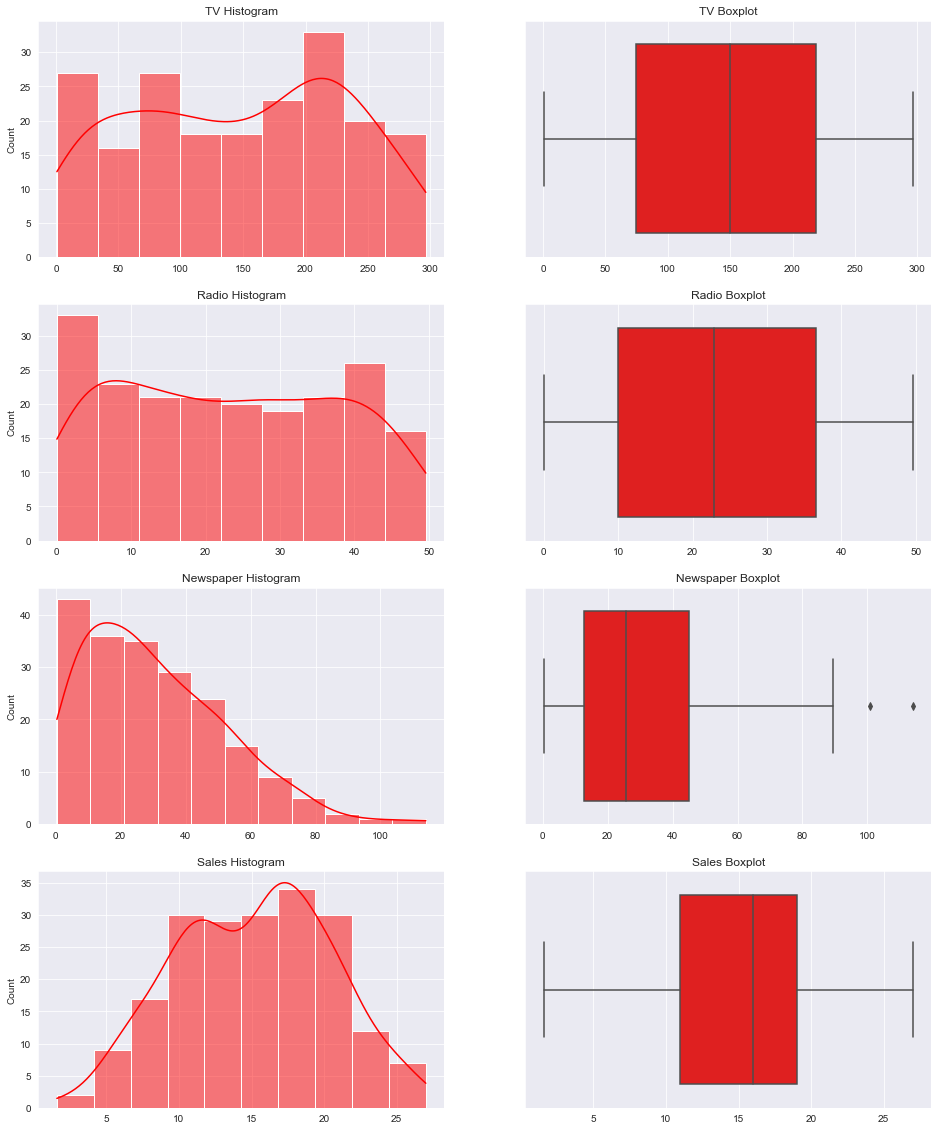

In [15]:
charts_count = len(new_columns)
fig, axs = plt.subplots(ncols=2, nrows=charts_count, figsize=(16, 5*charts_count))
sns.set_style('darkgrid')
for i in range(charts_count):
    column = new_columns[i]
    sns.histplot(df[column], color='red', kde=True, ax=axs[i][0])
    sns.boxplot(df[column], color='red', ax=axs[i][1])
    axs[i][0].set_title(columns_mapping[column] + ' Histogram')
    axs[i][1].set_title(columns_mapping[column] + ' Boxplot')
    axs[i][0].set_xlabel('')
    axs[i][1].set_xlabel('')

## Correlations

<AxesSubplot:>

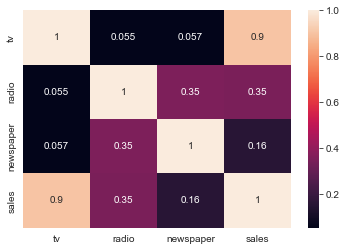

In [25]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [21]:
def draw_scatters(df, x, y):
    charts_count = len(y)
    fig, axs = plt.subplots(ncols=1, nrows=charts_count, figsize=(10, 6 * charts_count))
    for i in range(charts_count):
        sns.regplot(data=df, x=x, y=y[i], ax=axs[i], color='red')
        axs[i].set_title(columns_mapping[y[i]])
        axs[i].set_xlabel('')

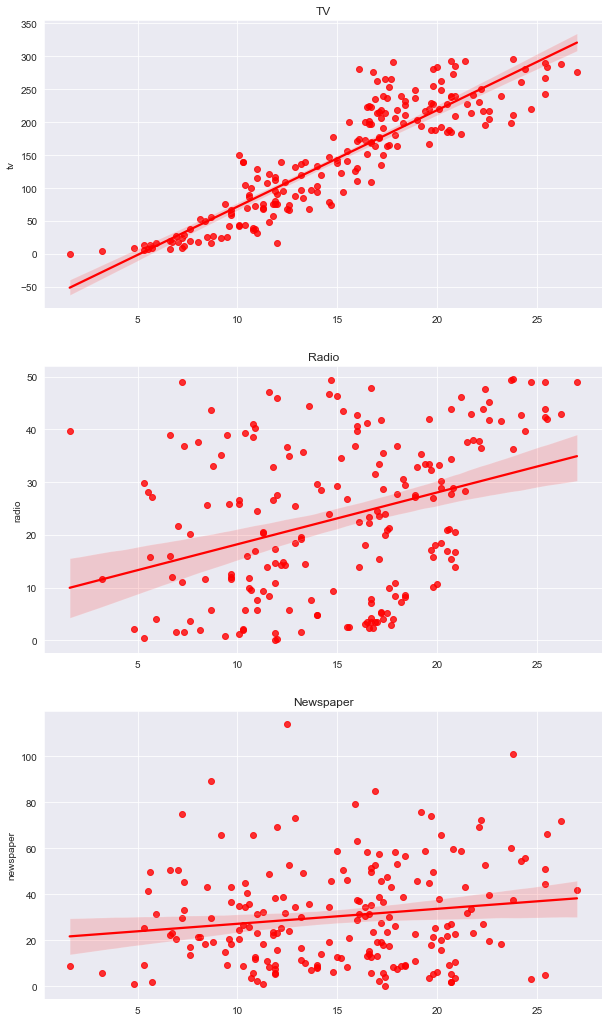

In [22]:
x = 'sales'
y = ['tv', 'radio', 'newspaper']
draw_scatters(df, x, y)

# Sales prediction

In [45]:
target = 'sales'
features = new_columns.copy()
features.remove(target)
X = df[features]
y = df[target]

In [46]:
models = {'Linear Regression' : LinearRegression(), 
          'Decision Tree' : DecisionTreeRegressor(random_state=SEED), 
          'Rendom Forest' : RandomForestRegressor(random_state=SEED)}
scores = []
for model in models:
    scores.append(cross_val_score(models[model], X, y, cv=6).mean())

In [47]:
pd.DataFrame(scores, index=list(models.keys()), columns=['Mean score'])

,Mean score
Linear Regression,0.895047
Decision Tree,0.915131
Rendom Forest,0.944481


# Feature importances

In [48]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)

## Linear regression

MAE : 1.291229641126968


<AxesSubplot:>

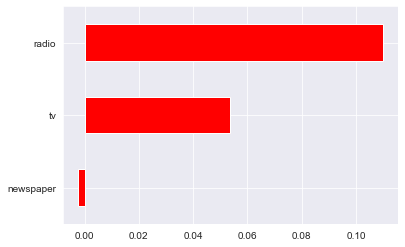

In [49]:
model = LinearRegression().fit(train_X, train_y)
predictions = model.predict(test_X)
print('MAE :', mean_absolute_error(test_y, predictions))
pd.Series(model.coef_, index=X.columns).sort_values().plot(kind='barh', color='red')

## Tree

MAE : 1.3649999999999998


<AxesSubplot:>

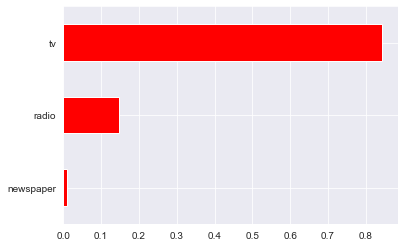

In [50]:
model = DecisionTreeRegressor(random_state=SEED).fit(train_X, train_y)
predictions = model.predict(test_X)
print('MAE :', mean_absolute_error(test_y, predictions))
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh', color='red')

## Forest

MAE : 1.0998249999999992


<AxesSubplot:>

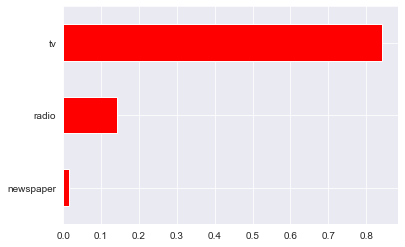

In [51]:
model = RandomForestRegressor(random_state=SEED).fit(train_X, train_y)
predictions = model.predict(test_X)
print('MAE :', mean_absolute_error(test_y, predictions))
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh', color='red')